In [45]:
from kompasssuche_test import kompasssuche_test
import numpy as np
from scipy.stats import ttest_ind, ranksums
import time
import matplotlib.pyplot as plt

In [25]:
def f(x): return x[0]**2 + x[1]**2

In [3]:
np.random.seed(1)

In [14]:
x_sample = np.random.uniform(low=-10, high=10, size=500)
y_sample = np.random.uniform(low=-10, high=10, size=500)

sample = np.array(list(zip(x_sample, y_sample)))

In [21]:
params = np.array([[1, 0.5], [2, 0.5], [1.5, 0.8], [0.5, 0.2]])

In [39]:
medians = []
for (s, t) in params:
    for (x, y) in sample:
        times = []
        for _ in range(100):
            start = time.perf_counter()
            kompasssuche_test(f, np.array([x, y]), s, t)
            exec_time_ms = (time.perf_counter() - start) * 1000
            times.append(exec_time_ms)
        times = np.array(times)
        medians.append(np.median(times, axis=0))

In [43]:
medians = np.array(medians)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff95de91cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff95de9d250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff95de91a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff95de9d790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff95de9da30>],
 'means': []}

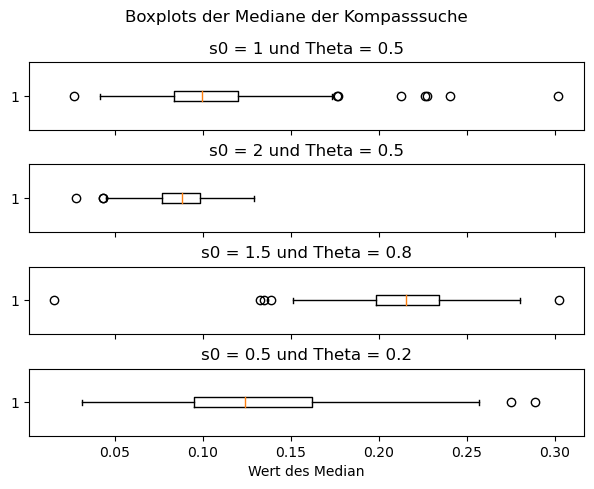

In [60]:
fig, ax = plt.subplots(4, sharex=True)
fig.suptitle('Boxplots der Mediane der Kompasssuche')
fig.tight_layout(pad=1.5)
plt.xlabel('Wert des Median')
ax[0].set_title('s0 = 1 und Theta = 0.5')
ax[0].boxplot(medians[:500], vert=False)#
ax[1].set_title('s0 = 2 und Theta = 0.5')
ax[1].boxplot(medians[500:1000], vert=False)
ax[2].set_title('s0 = 1.5 und Theta = 0.8')
ax[2].boxplot(medians[1000:1500], vert=False)
ax[3].set_title('s0 = 0.5 und Theta = 0.2')
ax[3].boxplot(medians[1500:2000], vert=False)